## 4(1) LGBM&CAT
221011일 학습시킨 모델의 코드이다. 최종적으로 LGBM을 택했으며 3.5381785399이 나왔다.
- learning_rate 지정이 학습을 방해하였다.
- 불필요한 Feature를 3개 제외하였다.('approximation', 'cosine', 'road_in_use')

### Import

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [2]:
train = pd.read_csv('../data/feature/20221015_train_select.csv', dtype={'maximum_speed_limit':int, 'weight_restricted':int})
test = pd.read_csv('../data/feature/20221015_test_select.csv', dtype={'maximum_speed_limit':int, 'weight_restricted':int})

In [3]:
# Feature가 아닌 변수를 제거한다.
train_id, test_id = train['id'], test['id'] ; del train['id'], test['id']

# X_train, y_train, X_test를 지정한다
y_train = train['target'] ; del train['target']
X_train, X_test = train, test
print('X_train.shape:', X_train.shape, 'X_test.shape', X_test.shape)

X_train.shape: (4701217, 31) X_test.shape (291241, 31)


### Split Data

In [4]:
train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, test_size=0.2, shuffle=False, random_state=2022)

### $\blacktriangleright$ LGBM

In [5]:
lgbm_reg = LGBMRegressor(n_estimators=1000, metric= 'mae', random_state = 2022)

In [6]:
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'mae', 
            "eval_set" : [(val_X, val_y)],
            'verbose': 1,
            'categorical_feature': ['day_of_week', 'road_rating','multi_linked', 'connect_code', 'maximum_speed_limit',
                                  'weight_restricted', 'road_type', 'start_turn_restricted', 'end_turn_restricted']}

In [7]:
lgbm_reg.fit(train_X, train_y, **fit_params)

C:\Users\ha\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\ha\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\ha\Anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ha\Anaconda3\lib\site-packages\lightgbm\basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New cate

[1]	valid_0's l1: 12.3701
[2]	valid_0's l1: 11.6296
[3]	valid_0's l1: 10.9692
[4]	valid_0's l1: 10.397
[5]	valid_0's l1: 9.89719
[6]	valid_0's l1: 9.44838
[7]	valid_0's l1: 9.03516
[8]	valid_0's l1: 8.68091
[9]	valid_0's l1: 8.37943
[10]	valid_0's l1: 8.08242
[11]	valid_0's l1: 7.82109
[12]	valid_0's l1: 7.58265
[13]	valid_0's l1: 7.3735
[14]	valid_0's l1: 7.19154
[15]	valid_0's l1: 7.02147
[16]	valid_0's l1: 6.87801
[17]	valid_0's l1: 6.75032
[18]	valid_0's l1: 6.62805
[19]	valid_0's l1: 6.51362
[20]	valid_0's l1: 6.41907
[21]	valid_0's l1: 6.33236
[22]	valid_0's l1: 6.22848
[23]	valid_0's l1: 6.15191
[24]	valid_0's l1: 6.07954
[25]	valid_0's l1: 6.02059
[26]	valid_0's l1: 5.95254
[27]	valid_0's l1: 5.9023
[28]	valid_0's l1: 5.83092
[29]	valid_0's l1: 5.77835
[30]	valid_0's l1: 5.72581
[31]	valid_0's l1: 5.69444
[32]	valid_0's l1: 5.64554
[33]	valid_0's l1: 5.59426
[34]	valid_0's l1: 5.5649
[35]	valid_0's l1: 5.5136
[36]	valid_0's l1: 5.4893
[37]	valid_0's l1: 5.43607
[38]	valid_0's l

[302]	valid_0's l1: 3.77303
[303]	valid_0's l1: 3.77236
[304]	valid_0's l1: 3.77021
[305]	valid_0's l1: 3.76972
[306]	valid_0's l1: 3.76809
[307]	valid_0's l1: 3.76542
[308]	valid_0's l1: 3.76314
[309]	valid_0's l1: 3.76102
[310]	valid_0's l1: 3.7604
[311]	valid_0's l1: 3.75835
[312]	valid_0's l1: 3.75519
[313]	valid_0's l1: 3.75358
[314]	valid_0's l1: 3.75276
[315]	valid_0's l1: 3.75108
[316]	valid_0's l1: 3.74841
[317]	valid_0's l1: 3.74641
[318]	valid_0's l1: 3.74531
[319]	valid_0's l1: 3.74376
[320]	valid_0's l1: 3.7433
[321]	valid_0's l1: 3.74191
[322]	valid_0's l1: 3.74133
[323]	valid_0's l1: 3.74032
[324]	valid_0's l1: 3.73963
[325]	valid_0's l1: 3.73874
[326]	valid_0's l1: 3.73681
[327]	valid_0's l1: 3.73476
[328]	valid_0's l1: 3.73304
[329]	valid_0's l1: 3.7317
[330]	valid_0's l1: 3.73112
[331]	valid_0's l1: 3.72931
[332]	valid_0's l1: 3.72769
[333]	valid_0's l1: 3.72643
[334]	valid_0's l1: 3.72532
[335]	valid_0's l1: 3.72423
[336]	valid_0's l1: 3.7233
[337]	valid_0's l1: 3.72

[599]	valid_0's l1: 3.49032
[600]	valid_0's l1: 3.48969
[601]	valid_0's l1: 3.48896
[602]	valid_0's l1: 3.48864
[603]	valid_0's l1: 3.48784
[604]	valid_0's l1: 3.48726
[605]	valid_0's l1: 3.48679
[606]	valid_0's l1: 3.48606
[607]	valid_0's l1: 3.48553
[608]	valid_0's l1: 3.48518
[609]	valid_0's l1: 3.48452
[610]	valid_0's l1: 3.48425
[611]	valid_0's l1: 3.48402
[612]	valid_0's l1: 3.48379
[613]	valid_0's l1: 3.48276
[614]	valid_0's l1: 3.48251
[615]	valid_0's l1: 3.48132
[616]	valid_0's l1: 3.48062
[617]	valid_0's l1: 3.48002
[618]	valid_0's l1: 3.47883
[619]	valid_0's l1: 3.47753
[620]	valid_0's l1: 3.47694
[621]	valid_0's l1: 3.47635
[622]	valid_0's l1: 3.47494
[623]	valid_0's l1: 3.47426
[624]	valid_0's l1: 3.47331
[625]	valid_0's l1: 3.47202
[626]	valid_0's l1: 3.47108
[627]	valid_0's l1: 3.47045
[628]	valid_0's l1: 3.47024
[629]	valid_0's l1: 3.46947
[630]	valid_0's l1: 3.46919
[631]	valid_0's l1: 3.46853
[632]	valid_0's l1: 3.46761
[633]	valid_0's l1: 3.46729
[634]	valid_0's l1: 

[896]	valid_0's l1: 3.36139
[897]	valid_0's l1: 3.36105
[898]	valid_0's l1: 3.36087
[899]	valid_0's l1: 3.3607
[900]	valid_0's l1: 3.36026
[901]	valid_0's l1: 3.35982
[902]	valid_0's l1: 3.3597
[903]	valid_0's l1: 3.35942
[904]	valid_0's l1: 3.35914
[905]	valid_0's l1: 3.35864
[906]	valid_0's l1: 3.35818
[907]	valid_0's l1: 3.35797
[908]	valid_0's l1: 3.3576
[909]	valid_0's l1: 3.35727
[910]	valid_0's l1: 3.35684
[911]	valid_0's l1: 3.35678
[912]	valid_0's l1: 3.35652
[913]	valid_0's l1: 3.35598
[914]	valid_0's l1: 3.3558
[915]	valid_0's l1: 3.35506
[916]	valid_0's l1: 3.35453
[917]	valid_0's l1: 3.35409
[918]	valid_0's l1: 3.35388
[919]	valid_0's l1: 3.35361
[920]	valid_0's l1: 3.35347
[921]	valid_0's l1: 3.3534
[922]	valid_0's l1: 3.35314
[923]	valid_0's l1: 3.35264
[924]	valid_0's l1: 3.35257
[925]	valid_0's l1: 3.35228
[926]	valid_0's l1: 3.35185
[927]	valid_0's l1: 3.35157
[928]	valid_0's l1: 3.35132
[929]	valid_0's l1: 3.35101
[930]	valid_0's l1: 3.35057
[931]	valid_0's l1: 3.350

LGBMRegressor(metric='mae', n_estimators=1000, random_state=2022)

### $\blacktriangleright$ CatBoost

In [ ]:
cat_params = {'iterations':1000,
              'eval_metric':'MAE',
              'bootstrap_type':'Bayesian',
              'cat_features':['day_of_week', 'road_rating','multi_linked', 'connect_code', 'maximum_speed_limit',
                              'weight_restricted', 'road_type', 'start_turn_restricted', 'end_turn_restricted'],
              'random_state':2022, 'task_type':"GPU"}

In [ ]:
cat_reg = CatBoostRegressor(**cat_params)

In [ ]:
cat_reg.fit(train_X, train_y)

### Feature Importance

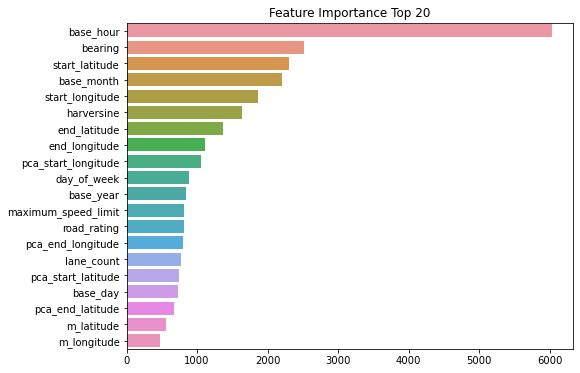

In [37]:
ft_importance_values = lgbm_reg.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

In [ ]:
ft_importance_values = cat_reg.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

### Make Submission File

In [38]:
sample = pd.read_csv('../data/raw/sample_submission.csv')
sample['target'] = lgbm_reg.predict(X_test)
display(sample)

,id,target
0,TEST_000000,24.696047
1,TEST_000001,44.676883
2,TEST_000002,65.026753
3,TEST_000003,35.681214
4,TEST_000004,41.648045
...,...,...
291236,TEST_291236,47.735659
291237,TEST_291237,51.917630
291238,TEST_291238,22.293100
291239,TEST_291239,23.829964


In [39]:
date = str(pd.Timestamp.now())[:10].replace('-','')
sample.to_csv(f'../data/submission/{date}.csv', index=False)